# [George McNinch](http://gmcninch.math.tufts.edu) Math 87 - Spring 2026

# Integer programming via Branch & Bound (reference material)
# Week 5


# Pseudo-code description of `branch-and-bound`



## Notation

We consider an ``integer linear program``:

$(\clubsuit)$ ``maximize`` $f(\mathbf{x}) = \mathbf{c}\cdot \mathbf{x}$

subject to:

- $\mathbf{x} \in \mathbb{Z}^n, \mathbf{x} \ge \mathbf{0}$ 
- $A \mathbf{x} \le \mathbf{b}$ for some $A \in \mathbb{R}^{r \times n}$ and $\mathbf{b} \in \mathbb{R}^r$.

Recall that $\mathbb{Z} = \{0, \pm 1, \pm 2, \cdots\}$ is the set of *integers*, and  $\mathbb{Z}^n$ is the just the set of vectors $\begin{bmatrix} a_1 & a_2 & \cdots & a_n \end{bmatrix}^T$ where $a_1,a_2, \dots, a_n \in \mathbb{Z}$.



We are going to suppose that we have found a vector 

$$\mathbf{M} = \begin{bmatrix} m_1 & m_2 & \cdots & m_n \end{bmatrix}^T \in \mathbb{Z}^n, \quad \mathbf{M} \ge \mathbf{0}$$ 

with the property that $\mathbf{x} > \mathbf{M} \implies \mathbf{x}$ is infeasible (i.e. $\mathbf{x} > \mathbf{M} \implies A \mathbf{x} > \mathbf{b}$).

In practice, it'll often be the case that $m_1 = m_2 = \cdots = m_n$ but that isn't a requirement for us.

Let's write

$$S = \{ \mathbf{x} \in \mathbb{Z}^n \mid \mathbf{0} \le \mathbf{x} \le \mathbf{M} \}.$$ 

Note that the number of elements $|S|$ in the set $S$ is given by the product 
$$S = \prod_{i=1}^n (m_i + 1) = (m_1 + 1) \times (m_2 + 1) \times \cdots \times (m_n + 1).$$


And according to our assumption, $S$ contains every feasible point $\mathbf{x}$ whose coordinates are integers. So a brute force approach to finding an optimal integral point $\mathbf{x}$ could
be achieved just by testing each element of $S$.

Our goal is to systematically eliminate many of the points in $S$.

## Algorithm overview

Keep the preceding notations. We sometimes refer to the entries $x_i$ of $\mathbf{x}$ as "variables".

In the algorithm, we are going to keep track of a `search_queue` which is initially empty: `[]`
and we are going to keep track of a `candidate_solution` which is initially `None`.

Let's focus on one entry of $\mathbf{x} = \begin{bmatrix} x_1 & x_2 & \cdots & x_n \end{bmatrix}^T \in \mathbb{Z}^n$, say the $j$-th entry for some $1 \le j \le n$ (we'll say more below about how we should select $j$).  i.e. we focus on the variable $x_j$.

Now, $x_j$ may take the values $0,1,2,\cdots,m_j$, so we consider
the following subsets of $S$:

$$\begin{matrix} 
S_0 &=& \{\mathbf{x} \in S \mid x_j = 0\} \\
S_1 &=& \{\mathbf{x} \in S \mid x_j = 1\} \\
\vdots & \vdots & \vdots \\
S_{m_j} & = & \{\mathbf{x} \in S \mid x_j = m_j\}
\end{matrix}$$
 
Thus we have *partitioned* $S$ as a *disjoint union* of certain subsets:

$$S = S_0 \cup S_1 \cup \cdots \cup S_{m_j}$$





For $0 \le i \le m_j$, consider the (relaxed) linear program $\mathcal{L}_i$ determined by `(c,A_ub,b_ub)` together with the equality constraint `xj=i`.
Let's write `h_i` for the optimal value determined by solving this linear program, and `x_i` for a solution.

Now we loop `i` between `0` and `m_j`.

At each step of the loop, we check whether `x_i` is an integer solution. 

If `x_i` is integral, computer the value `h_i` of the objective function at `x_i` with the value of the objective function at the current `candidate_solution`. If the value at `x_i` is higher, we replace the `candidate_solution` with `x_i`. Then we scan through the `search_queue`. For each item in the search queue, if `h_i` exceeds the value of the item, we remove it from the search queue.

If `x_i` is not integral and if `h_i` exceeds the value of the objective function at the current `candidate_solution`, 
we then add the data 
```
{ constraints = [ (j,i) ],
  value = h_i
}
```
to the search queue and proceed with the loop.

When this loop on `i` is completed, 
we check whether the `search_queue` is empty. If it is, we return the value of `candidate_solution` and terminate the program.

Otherwise, we choose an element (e.g., the first element) of the `search_queue`, say it is 

```
{ constraints j= [ (j0,i0) ],
  value = h_i0
}
```


As before, we consider a loop of `i` between `0` and `m_l`. Now we consider the linear program $\mathcal{L}_i$ determined by `(c,A_ub,b_ub)` toegether with the equality constraints
`x_j0 = i0` and `x_l = i`; here we get optimal values `h_i` and solutions `x_i`.


At each step of this loop, we check whether `x_i` is an integer solution. 

If `x_i` is integral, compare the value `h_i` of the objective function at `x_i` with the value of the objective function at the current `candidate_solution`. If the value at `x_i` is higher, we replace the `candidate_solution` with `x_i`. Then we scan through the `search_queue`. For each item in the search queue, if `h_i` exceeds the value of the item, we remove it from the search queue.

If `x_i` is not integral and if `h_i` exceeds the value of the objective function at the current `candidate_solution`, 
we then add the data 
```
{ constraints = [ (l,i), (j0,i0) ],
  value = h_i0
}
```
to the search queue and proceed with the loop.


We can continue in this way; notice that the entries in the `search_queue` "remember" all the constraints that have been made "above it".


Eventually this process will result in an empty `search_queue` and at that point the `candidate_solution` is the actual solution.


As a guiding heuristic, at the start of the algorithm -- and when we branch on items in the `search_queue` -- we 
choose the variable on which we branch by finding the solution value which is non-integral but closest to a integer.

We can use some python code to carry out this algorithm (though in practice we'll defer to using a package like `pulp` to actually solve
integer programs).

In [1]:
import numpy as np
from scipy.optimize import linprog

def sbv(index,size):
    return np.array([1.0 if i == index else 0.0 for i in range(size)])

# description of linear program as dictionary has this format:
# lp = { "goal": "maximize",  # or "minimize"...
#        "obj": ...,          # remaining fields should be of the form np.array(...) 
#        "Aub": ...,          
#        "bub": ...
#    }

# and we need to pass a list of equality constraints, each of the form
# {"index": i, "value": v}
# This dictionary represents the equality constraint "x_i = v"

def get_optimal(lp,specs = []):
    n = len(lp["obj"])

    Aeq = np.array([sbv(spec["index"],n) for spec in specs])
    beq = np.array([spec["value"] for spec in specs]) 

    #print(Aeq,beq)
    sgn = -1 if lp["goal"]=="maximize" else 1
    result = linprog(sgn*lp["obj"], 
                         A_ub=lp["Aub"], 
                         b_ub=lp["bub"], 
                         A_eq = Aeq if not(specs==[]) else None, 
                         b_eq = beq if not(specs==[]) else None,
                         bounds = lp["bounds"] if lp["bounds"] else None
                    )

    if result.success:
        return (sgn*result.fun,result.x)
    else:
        return "lin program failed"

Example
-------------------

Consider again  the integer linear program

$(\diamondsuit) \quad $ ``maximize`` $f(x_0,x_1) = x_0 + 5x_1$; i.e. $\mathbf{c} \cdot \mathbf{x}$ where $\mathbf{c} = \begin{bmatrix} 1 & 5 \end{bmatrix}$.

such that $A \mathbf{x} = \begin{bmatrix} 1 & 10 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \end{bmatrix} \le
\begin{bmatrix} 20 \\ 2 \end{bmatrix}$ and $\mathbf{x} \ge \mathbf{0}$ for $\mathbf{x} \in \mathbb{Z}^2$.

We notice that $(*) \quad \mathbf{x} > \begin{bmatrix} 2 & 2 \end{bmatrix}^T \implies \mathbf{x}$ is not feasible.

To begin, we first solve the linear program obtained from $(\diamondsuit)$ by considering $\mathbf{x} \in \mathbb{R}^2$. 

Here is our dictionary representation of this linear program

In [2]:
lp = { "goal": "maximize",
       "obj": np.array([1,5]),
       "Aub": np.array([[1,10],[1,0]]),
       "bub": np.array([20,2]),
       "bounds": 2*[(0,None)]
     }

And we can get a ("relaxed") solution using the above code, with `specs = []` -- i.e. no equality constraints.

In [3]:
val,sol = get_optimal(lp)

print(f"The optimal value is v = {val} and an optimal solution is {sol}")

The optimal value is v = 11.0 and an optimal solution is [2.  1.8]


Thus for this optimal solution, $x_0$ is already an integer, so we branch on $x_1$.

Now we branch on `x1`. Recall that -- according to $(*)$ -- we need only consider values of `x1` in `[0,1,2]`.

In [4]:
[ (v,get_optimal(lp,[{"index":1, "value": v}])) for v in [0,1,2] ]


[(0, (2.0, array([ 2., -0.]))),
 (1, (7.0, array([2., 1.]))),
 (2, (10.0, array([-0.,  2.])))]

Thus, we first add both

```
{ constraint: [ (1,0) ],
  value: 2.0
},
{ constraint: [ (1,1) ],
  value: 7.0
}
```

to `search_queue`. When we arrive `i=2`, we find an *integral* solution `x = [0,2]` with value 10.0. So we prune both of the two preceding items from the `search_queue` and insert `[0,2]` as the `candidate_solution`.

Now we notice that `search_queue == []` and so the `candidate_solution` is in fact the actual solution.

Recall that -- in the notation used above -- `fi` denotes the maximum value of the objective function on points having
`x1 == i`.  The preceding calculation shows that


One often presents this algorithm via a tree diagram, like the following:

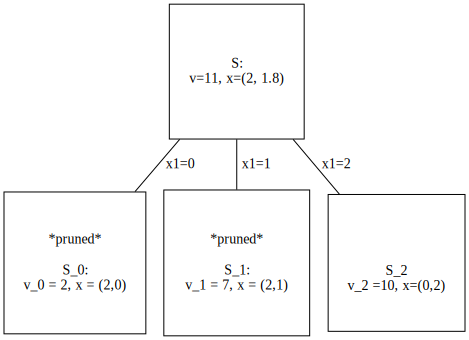

In [5]:
from graphviz import Graph

## https://www.graphviz.org/
## https://graphviz.readthedocs.io/en/stable/index.html

dot = Graph('bb1')

dot.node('S','S:\nv=11, x=(2, 1.8)',shape="square")

dot.node('S0','*pruned*\n\nS_0:\nv_0 = 2, x = (2,0)',shape="square")
dot.node('S1','*pruned*\n\nS_1:\nv_1 = 7, x = (2,1) ',shape="square")
dot.node('S2','\n\nS_2\nv_2 =10, x=(0,2)',shape="square")


dot.edge('S','S0','x1=0')
dot.edge('S','S1','x1=1')
dot.edge('S','S2','x1=2')

dot

--------------------
Now let's consider a more elaborate example.

Example
=======

$(\heartsuit) \quad $ ``maximize`` $f(\mathbf{x}) = \begin{bmatrix} 10 & 7 & 4 & 3 & 1 & 0 \end{bmatrix} \cdot \mathbf{x}$

subject to: $\mathbf{x} = \begin{bmatrix} x_1 & x_2 & x_3 & x_4 &x_5 & x_6 \end{bmatrix}^T \in \mathbb{R}^5$, $\mathbf{x} \ge \mathbf{0}$, 

$x_1,x_2,x_3,x_4,x_5 \in \{0,1\}$

and $A \mathbf{x} \le \mathbf{b}$

where $A = \begin{bmatrix}
 2 & 6 & 1 & 0 & 0 & 1 \\
 1 & 0 & 2 & -3 & 1 & -1 \\
 2 & -3 & 4 & 1 & 1 & 0 \\
 1 & 1 & 1 & 1 & -1 & 0  \\
\end{bmatrix}, \quad
\mathbf{b} = \begin{bmatrix}
7 \\ -1 \\ 3 \\ 3
\end{bmatrix}.$



Notice that we *aren't* imposing any integral condition on $x_6$, but we require that $x_i \in \mathbb{Z}$ for $1 \le i \le 5$, and even more: these coordinates may only take the value $0$ or $1$.

The procedure described above can (with perhaps some minor adaptations) be applied to this problem, as we now describe. Note that -- unlike the previous example -- we will have to iterate our procedure. 

-------

We begin by formulating the linear program
which replaces the integrality condition 
$x_1,x_2,x_3,x_4,x_5 \in \{0,1\}$
with the condition $\begin{bmatrix} x_1 & x_2 & x_3 & x_4 &x_5 \end{bmatrix}^T \le \begin{bmatrix} 1 & 1 & 1 & 1 & 1\end{bmatrix}^T$ 


In [6]:

nlp = {"goal": "maximize",
       "obj": np.array([10,7,4,3,1,0]),
       "Aub": np.array([[2,6,1,0,0,1],
                        [1,0,2,-3,1,-1],
                        [2,-3,4,1,1,0],
                        [1,1,1,1,-1,0]]),
       "bub": np.array([7,-1,3,3]),
       "bounds": 5*[(0,1)] + [(0,None)]
      }


Solving this linear program yields the following:

In [7]:
resA = get_optimal(nlp)
resA

(20.209302325581397,
 array([1.        , 0.72093023, 0.48837209, 1.        , 0.20930233,
        0.18604651]))

We are going to label this solution **(A)** 

Of the non-integer coordinates of the solution `x` to **(A)**, the one closest to an integer is `x4 = 0.21`.
(Remember that we don't impose an integrality condition on `x5`!!)

We now **Branch on (A)** with `x4`:

We label **(B)** the result of setting ``x4==0`` (and we add it to our `search_queue`):

In [8]:
## B

resB =  get_optimal(nlp,[{"index": 4, "value": 0}])
resB

(19.44444444444445,
 array([ 1.        ,  0.77777778,  0.33333333,  0.88888889, -0.        ,
         0.        ]))


And we label **(C)** the result of setting `x4==1`  (and we add it to our `search_queue`):

In [9]:
## C

resC = get_optimal(nlp,[{"index": 4, "value": 1}])
resC

(19.96969696969697,
 array([1.        , 0.6969697 , 0.27272727, 1.        , 1.        ,
        0.54545455]))


We must now branch off of both **(B)** and **(C)**. 

We'll begin with **(C)** and branch on `x2`

**(D)** will be the result of branching from **(C)** with `x2==0` (and the results are added to our `search_queue`):

In [10]:
## D

resD = get_optimal(nlp,[{"index": 4, "value": 1}, 
                        {"index": 2, "value": 0}])

resD

(19.833333333333336,
 array([ 1.        ,  0.83333333, -0.        ,  1.        ,  1.        ,
         0.        ]))

**(E)** will be the result of branching from **(C)** with `x2==1` :

In [11]:
## E

resE = get_optimal(nlp,[{"index": 4, "value": 1}, 
                        {"index": 2, "value": 1}])

resE

'lin program failed'

This branching failed because there are no feasible points.
So in fact (E) is not added to `search_queue`. Effectively, (E) is *pruned*.


We now branch on **(D)** with `x1`

**F** will be the result of branching on **(D)** with `x1==0`:

In [12]:
## F

resF = get_optimal(nlp,[{"index": 4, "value": 1}, 
                        {"index": 2, "value": 0},
                        {"index": 1, "value": 0}])

resF

(11.0, array([ 1., -0.,  0., -0.,  1.,  3.]))

Note that **(F)** gives an integral solution.
So now our `candidate_solution` is `[ 1., -0.,  0., -0.,  1.,  3.]` (replacing `None`),
although the objective function value at this solution does not permit us to prune any entries in the `search_queue`.

Now,
**(G)** will be the result of branching on **(D)** with `x1==1`:

In [13]:
## G

resG = get_optimal(nlp,[{"index": 4, "value": 1}, 
                        {"index": 2, "value": 0}, 
                        {"index": 1, "value": 1}])

resG

(16.0, array([0.5, 1. , 0. , 1. , 1. , 0. ]))

We add this result to the `search_queue`.

We now return and **branch on (B)** with `x4`:

**(H)** will be the result of branching on **(B)** with `x3==0`:

In [14]:
## H

resH = get_optimal(nlp,[{"index": 4, "value": 0},
                        {"index": 3, "value": 0}])

resH

(13.727272727272727,
 array([ 1.        ,  0.27272727,  0.45454545, -0.        ,  0.        ,
         2.90909091]))

this is again added to the `search_queue`.

**(I)** will be the result of branching on **(B)** with `x3==1`:

In [15]:
## I

resI = get_optimal(nlp,[{"index": 4, "value": 0},
                        {"index":3, "value": 1}])

resI

(19.4, array([ 1. ,  0.8,  0.2,  1. , -0. ,  0. ]))


Now **branch on (I)** with `x1`:


**(J)** will be the result of branching from **(I)** with `x1=0`.


In [16]:
## J

resJ = get_optimal(nlp,[{"index": 4, "value": 0},
                        {"index":3, "value": 1},
                        {"index":1, "value": 0}])

resJ

(13.0, array([ 1., -0., -0.,  1., -0.,  0.]))

The solution **(J)** is an integer point, and the objective value $13$ is larger than the objective value for the current `candidate_solution`,
so we replace the `candidate_solution` by `[ 1., -0., -0.,  1., -0.,  0.]`. (This effectively *prunes* (F)).

**(K)** will be the result of branching from **(I)** with `x1=1`:


In [17]:
## K

resK = get_optimal(nlp,[{"index": 4, "value": 0},
                        {"index": 3, "value": 1},
                        {"index": 1, "value": 1}])

resK

(15.0, array([ 0.5,  1. ,  0. ,  1. , -0. ,  0. ]))

Now **branch from (G)** with $x_1$:

**(L)** will be the result of branching from **(G)** with `x0=0`


In [18]:
## L

resL = get_optimal(nlp,[{"index": 4, "value": 1}, 
                        {"index": 2, "value": 0}, 
                        {"index": 1, "value": 1},
                        {"index": 0, "value": 0}])

resL

(11.0, array([-0.,  1., -0.,  1.,  1.,  0.]))


This is an integer solution. Since 17 exceeds 13, our new `candidate_solution` is `[-0.,  1., -0.,  3.,  1.,  0.]`.
Thus we effectively prune (J).

**(M)** is the result of branching from **(G)** with $x_0=1$


In [19]:
## M

resM = get_optimal(nlp,[{"index": 4, "value": 1}, 
                        {"index": 2, "value": 0}, 
                        {"index": 1, "value": 1},
                        {"index": 0, "value": 1}])

resM

'lin program failed'

The linear program **(M)** is infeasible.




Finally, **branch from (K)** with $x_1$

**(N)** is the result of branching from **(K)** with `x0=0`:

In [20]:
## N 


resN = get_optimal(nlp,[{"index": 4, "value": 0},
                        {"index":3, "value": 1},
                        {"index": 1, "value": 1},
                        {"index": 0, "value": 0}])

resN

(14.0, array([-0.,  1.,  1.,  1., -0.,  0.]))

**(N)** gives an integer solution, but the objective function value of 14 does not exceed the objective function value of the current `candidate_solution`. So we prune (N).

**(O)** is the result of branching from **(K)** with `x0=1`:

In [21]:
## O


resO = get_optimal(nlp,[{"index": 4, "value": 0},
                        {"index":3, "value": 1},
                        {"index": 1, "value": 1},
                        {"index": 0, "value": 1}])
resO

'lin program failed'

This linear program is infeasible.

We are now **finished**; the integer solution from **(L)**, namely


In [22]:
resL

(11.0, array([-0.,  1., -0.,  1.,  1.,  0.]))

is the optimal integral solution.

We now construct (via ``graphviz``) the *tree* corresponding to the branch-and-bound just carried out; see below.


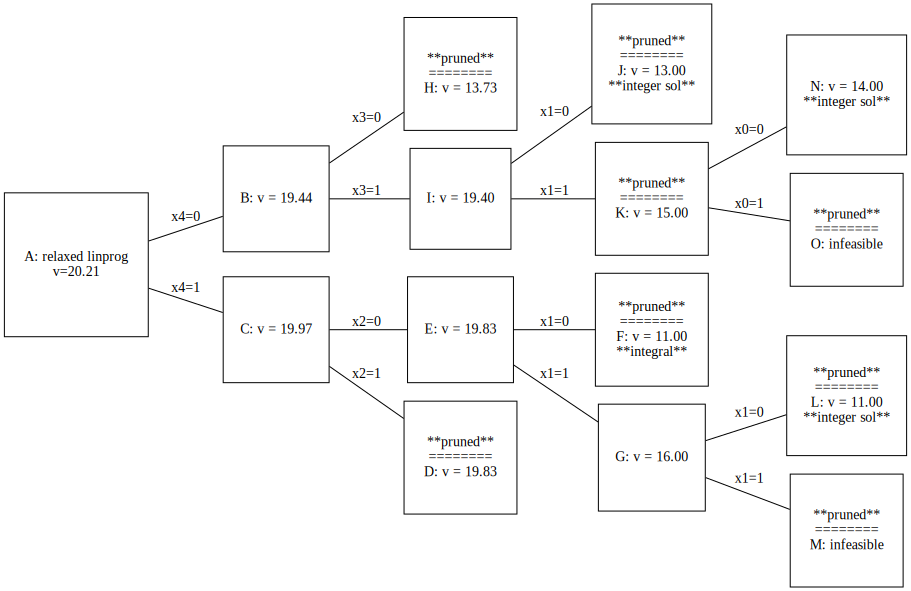

In [23]:
from graphviz import Graph

## https://www.graphviz.org/
## https://graphviz.readthedocs.io/en/stable/index.html

dot = Graph('bb1')
dot.attr(rankdir='LR')
dot.node('A',f"A: relaxed linprog\nv={resA[0]:.2f}",shape="square")

dot.node('B',f"B: v = {resB[0]:.2f}",shape="square")
dot.node('C',f"C: v = {resC[0]:.2f}",shape="square")
dot.node('D',f"E: v = {resD[0]:.2f}",shape="square")
dot.node('E',f"**pruned**\n========\nD: v = {resD[0]:.2f}",shape="square")
dot.node('F',f"**pruned**\n========\nF: v = {resF[0]:.2f}\n**integral**",shape="square")
dot.node('G',f"G: v = {resG[0]:.2f}",shape="square")
dot.node('H',f"**pruned**\n========\nH: v = {resH[0]:.2f}",shape="square")
dot.node('I',f"I: v = {resI[0]:.2f}",shape="square")
dot.node('J',f"**pruned**\n========\nJ: v = {resJ[0]:.2f}\n**integer sol**",shape="square")
dot.node('K',f"**pruned**\n========\nK: v = {resK[0]:.2f}",shape="square")
dot.node('L',f"**pruned**\n========\nL: v = {resL[0]:.2f}\n**integer sol**",shape="square")
dot.node('M','**pruned**\n========\nM: infeasible',shape="square")
dot.node('N',f"N: v = {resN[0]:.2f}\n**integer sol**",shape="square")
dot.node('O','**pruned**\n========\nO: infeasible',shape="square")


dot.edge('A','B','x4=0')
dot.edge('A','C','x4=1')

dot.edge('B','H','x3=0')
dot.edge('B','I','x3=1')

dot.edge('C','D','x2=0')
dot.edge('C','E','x2=1')

dot.edge('D','F','x1=0')
dot.edge('D','G','x1=1')

dot.edge('G','L','x1=0')
dot.edge('G','M','x1=1')

dot.edge('I','J','x1=0')
dot.edge('I','K','x1=1')


dot.edge('K','N','x0=0')
dot.edge('K','O','x0=1')



dot

## `pulp` solution 

In [24]:
from pulp import *

# Create the problem
prob = LpProblem("Example", LpMaximize)

# Define variables
# x1, x2, x3, x4, x5 are binary (0 or 1)
x1 = LpVariable("x1", cat='Binary')
x2 = LpVariable("x2", cat='Binary')
x3 = LpVariable("x3", cat='Binary')
x4 = LpVariable("x4", cat='Binary')
x5 = LpVariable("x5", cat='Binary')

# x6 is continuous, non-negative
x6 = LpVariable("x6", lowBound=0, cat='Continuous')

# Objective function: maximize 10x1 + 7x2 + 4x3 + 3x4 + x5 + 0x6
prob += 10*x1 + 7*x2 + 4*x3 + 3*x4 + x5

# Constraints: Ax <= b
# Row 1: 2x1 + 6x2 + x3 + x6 <= 7
prob += 2*x1 + 6*x2 + x3 + x6 <= 7

# Row 2: x1 + 2x3 - 3x4 + x5 - x6 <= -1
prob += x1 + 2*x3 - 3*x4 + x5 - x6 <= -1

# Row 3: 2x1 - 3x2 + 4x3 + x4 + x5 <= 3
prob += 2*x1 - 3*x2 + 4*x3 + x4 + x5 <= 3

# Row 4: x1 + x2 + x3 + x4 - x5 <= 3
prob += x1 + x2 + x3 + x4 - x5 <= 3

# Solve
prob.solve()

# Print results
print(f"Status: {LpStatus[prob.status]}")
print(f"Optimal value: {value(prob.objective)}")
print(f"Solution:")
print(f"  x1 = {value(x1)}")
print(f"  x2 = {value(x2)}")
print(f"  x3 = {value(x3)}")
print(f"  x4 = {value(x4)}")
print(f"  x5 = {value(x5)}")
print(f"  x6 = {value(x6)}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/george/Prof-VC/classes/AY2025-2026--2026-sp--Math087/.venv/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/4388f1ee922a4aeda67ba6a514ab5f5e-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/4388f1ee922a4aeda67ba6a514ab5f5e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 44 RHS
At line 49 BOUNDS
At line 55 ENDATA
Problem MODEL has 4 rows, 6 columns and 19 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 20.2093 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 1 strengthened rows, 0 substitutions
Cgl0004I processed model has 4 rows, 6 columns (6 integer (5 of which binary)) and 18 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 3 integers unsatisfied sum - 1.14286
Cbc0038I Pass   



# Postscript

It turns out that solving integer programming problems is *hard*. In fact, in computer
science, integer programming problems are [**NP-hard**](https://en.wikipedia.org/wiki/NP-completeness) 
— see the [discussion here](https://en.wikipedia.org/wiki/Integer_programming).

**What this means in practice:**
- Small problems (dozens of variables) solve quickly
- Large problems (thousands of variables) can take hours or fail to solve
- Problem structure matters enormously — some IPs are much harder than others
- Commercial solvers (Gurobi, CPLEX) use many sophisticated techniques beyond basic branch-and-bound

The algorithm we described is a basic **branch-and-bound algorithm**. Modern solvers use 
this idea but add:
- Smarter branching strategies
- Cutting planes (adding constraints to tighten LP relaxations)
- Heuristics to find good integer solutions quickly
- Parallel processing

**Bottom line:** Understanding branch-and-bound helps you formulate problems well and 
interpret solver behavior, but implementing a competitive IP solver is a major undertaking.